In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16,9]
%matplotlib inline

In [15]:
#Reading data

#This is the original pollution dataset

#pdata = pd.read_csv('data/pollution-1.csv',parse_dates=['ReadingDateTime'])

#This is the weather dataset after extracting numerical values and downsampling

#wdata = pd.read_csv('vis/weather-1-cleaned.csv')

#This is the joined dataset of original features

cdata= pd.read_csv('vis/weather-pollution.csv')

# This is cdata with no outliers

cdata_out = pd.read_csv('vis/weather-pollution-no-outliers.csv')

#This is the final dataset with all added features before handling nulls

final  = pd.read_csv('vis/final-visualization.csv')

In [ ]:
##############################  CREATE DATA VISUALISATIONS FOR ALL STEPS #################################

In [10]:
data = cdata

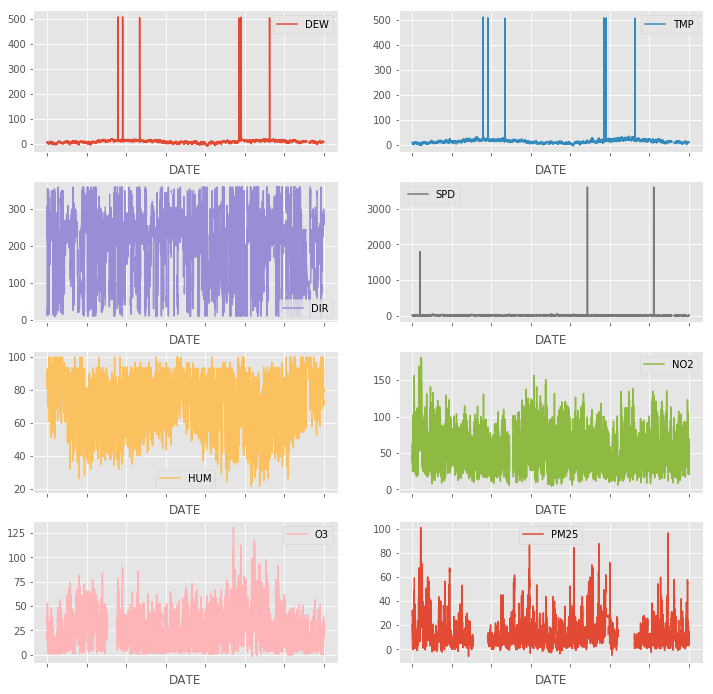

In [11]:
#Timeseries visualization of the merged dataset	
data.set_index('DATE').plot(subplots=True,layout=(4,2), figsize=(12, 12),sharex=False);

In [13]:
data = cdata_out

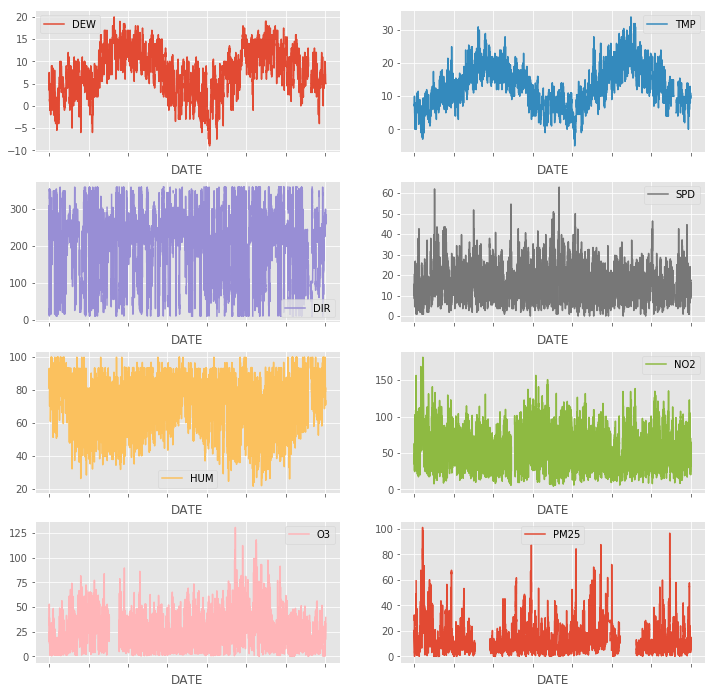

In [14]:
#Visualization after handling outliers:
data.set_index('DATE').plot(subplots=True,layout=(4,2), figsize=(12, 12),sharex=False);

In [16]:
data = final

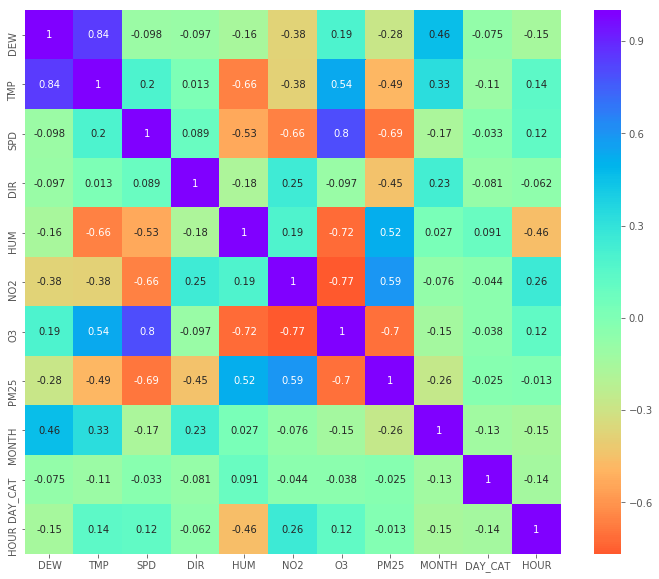

In [17]:
#Correlation_Matrix
plt.rcParams["figure.figsize"] = [12,10]
data_corr = data[['DEW','TMP','SPD','DIR','HUM','NO2','O3','PM25','MONTH','DAY_CAT','HOUR']].corr()

# def plot_corr_matrix(data, size=10):
#     corr = data.corr()
#     figure, axes = plt.subplots(figsize=(size, size))
#     axes.matshow(corr)
#     plt.xticks(range(len(corr.columns)), corr.columns) 
#     plt.yticks(range(len(corr.columns)), corr.columns) 
    
# plot_corr_matrix(data_corr)

corr = data_corr.corr()
sns.heatmap(corr, center=0, annot=True,cmap="rainbow_r",
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

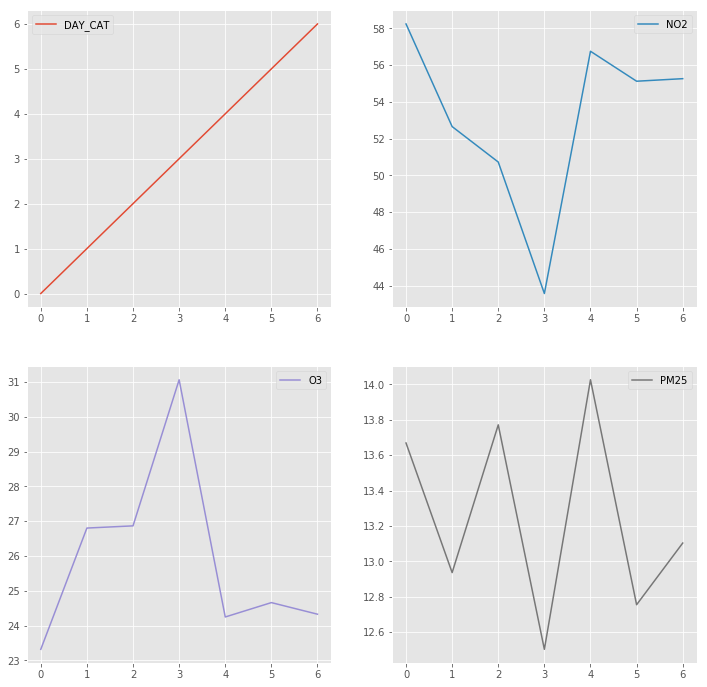

In [18]:
#Visualization of mean of features based on day of the week

mean_plot_data = data[['NO2','O3','PM25','DAY_CAT']].groupby('DAY_CAT').apply(lambda x:x.mean())
mean_plot_data.drop('DAY_CAT',axis=1).reset_index().plot(subplots=True,layout=(2,2), figsize=(12, 12),sharex=False);

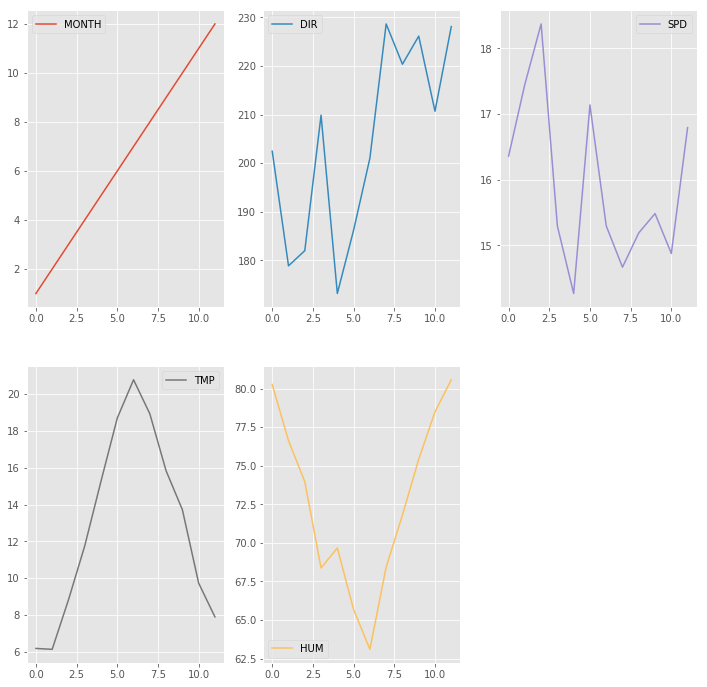

In [19]:
#Visualization of mean of features based on month of the year

mean_plot_data = data[['DIR','SPD','TMP','HUM','MONTH']].groupby('MONTH').apply(lambda x:x.mean())
mean_plot_data.drop('MONTH',axis=1).reset_index().plot(subplots=True,layout=(2,3), figsize=(12, 12),sharex=False);

# Thresholds


| Species 	| Min   	| Max  	|
|---------	|-------	|------	|
| DEW     	| -98.2 	| 36.8 	|
| TMP     	| -93.2 	| 61.8 	|
| DIR     	| 1     	| 360  	|
| SPD     	| 0     	| 324  	|
| HUM     	| 0     	| 100  	|
| NO2     	| 0     	| 601  	|
| O3      	| 0     	| 241  	|
| PM25    	| 0     	| 71   	|